In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Anyfile Notepad Files'		      Pandemic
 Classroom			      players_1920.csv.gsheet
'Colab Notebooks'		      SwitchDamageDetector
 Dipit-Jaywant			      SwitchOn
'How to get started with Drive.pdf'   SwitchOnAssignment
 Image.ipynb			      SwitchOnNew
'MacOS Django Setup'		      yolov3


In [ ]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0  40441      0 --:--:-- --:--:-- --:--:-- 40441


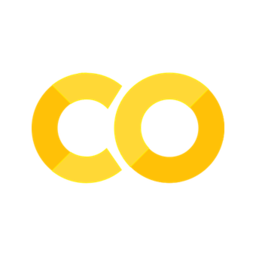

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
net = cv2.dnn.readNet('/mydrive/yolov3/yolov3_custom_last.weights', '/mydrive/yolov3/yolov3_custom.cfg')

In [ ]:
classes = []
with open('/mydrive/yolov3/obj.names', 'r') as f:
  classes = [line.strip() for line in f.readlines()]

print(classes)

['smudge', 'ruststain', 'missingnut', 'blackspot']


In [ ]:
images_path = glob.glob(r'/mydrive/yolov3/bad_image.jpg')

In [ ]:
layer_names = net.getLayerNames()
# To get he output layers to display the final detection
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255, size=(len(classes),3))

0
2
1
3
1
1
[[1]
 [5]
 [2]
 [0]
 [3]
 [4]]


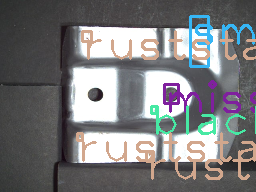

In [15]:
random.shuffle(images_path)
for img_path in images_path:
  #Loading images
  img = cv2.imread(img_path)
  img = cv2.resize(img, None, fx=0.4, fy=0.4)
  height, width, channels = img.shape

  # Detecting objects we convert the image to blob to extract the features out of an image
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop = False)
  #                                       yolo algorithm size  inverting blue to red
  net.setInput(blob)                        
  outs = net.forward(output_layers)

  # Showing information on the screen
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.3:
        #object detected
        print(class_id)
        center_x = int(detection[0]*width)
        center_y = int(detection[1]*height)
        w = int(detection[2]*width)
        h = int(detection[3]*height)

        #Rectangle coordinates
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)

        boxes.append([x,y,w,h])
        confidences.append(float(confidence))
        class_ids.append(class_id)
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.3)
  print(indexes)
  font = cv2.FONT_HERSHEY_PLAIN
  for i in range(len(boxes)):
    if i in indexes:
      x,y,w,h = boxes[i]
      label = str(classes[class_ids[i]])
      color = colors[class_ids[i]]
      cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
      cv2.putText(img,label, (x,y+30), font, 3, color, 2)

  cv2_imshow(img)
  key = cv2.waitKey(0)

cv2.destroyAllWindows()